In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
import pandas as pd
modellingph2=pd.read_csv("../input/vehiclesplusgdp/vehiclesplusGDP.csv")

In [15]:
modellingph2.drop(["GDP2015","GDP2014","GDP2013","GDP2012","GDP2011"],axis=1,inplace=True)

In [16]:
modellingph2

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,GDP2018,GDP2017,GDP2016
0,17899,2012.0,volkswagen,excellent,4,gas,63500.0,clean,manual,4wd,hatchback,black,west,"44,636","44,204","43,069"
1,13999,2009.0,ram,good,6,gas,120057.0,clean,automatic,4wd,pickup,silver,west,"44,636","44,204","43,069"
2,34500,2017.0,ford,excellent,6,diesel,95484.0,clean,automatic,4wd,pickup,white,west,"44,636","44,204","43,069"
3,14500,2007.0,gmc,excellent,6,gas,89340.0,clean,automatic,4wd,pickup,white,west,"44,636","44,204","43,069"
4,12500,2013.0,ford,salvage,6,gas,226031.0,clean,automatic,4wd,pickup,white,west,"44,636","44,204","43,069"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411336,17500,2015.0,ford,good,6,gas,67634.0,clean,automatic,2wd,other,red,south,"43,267","42,797","41,828"
411337,13900,2015.0,kia,good,6,gas,25623.0,clean,automatic,2wd,coupe,silver,south,"43,267","42,797","41,828"
411338,27600,2016.0,audi,good,6,gas,29344.0,clean,automatic,4wd,other,white,south,"43,267","42,797","41,828"
411339,17499,2018.0,jeep,like new,6,gas,52449.0,clean,automatic,4wd,SUV,red,south,"43,267","42,797","41,828"


In [17]:
for index,row in modellingph2.iterrows():
    modellingph2.at[index,"GDP2018"]=row["GDP2018"].replace(",","")
    modellingph2.at[index,"GDP2017"]=row["GDP2017"].replace(",","")
    modellingph2.at[index,"GDP2016"]=row["GDP2016"].replace(",","")
    
tonumeric=["GDP2018","GDP2017","GDP2016"]

for val in tonumeric:
    modellingph2[val]=pd.to_numeric(modellingph2[val])

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
modellingph2["price"]=np.log1p(modellingph2["price"])

In [26]:
modellingph2.corr()

,price,year,cylinders,odometer,GDP2018,GDP2017,GDP2016
price,1.000000,0.492331,0.186533,-0.538813,-0.017143,-0.012466,-0.012381
year,0.492331,1.000000,-0.180484,-0.427561,-0.006890,-0.004243,-0.002937
cylinders,0.186533,-0.180484,1.000000,0.143621,-0.044336,-0.041716,-0.041308
odometer,-0.538813,-0.427561,0.143621,1.000000,-0.040240,-0.040923,-0.041004
GDP2018,-0.017143,-0.006890,-0.044336,-0.040240,1.000000,0.996665,0.992110
GDP2017,-0.012466,-0.004243,-0.041716,-0.040923,0.996665,1.000000,0.997968
GDP2016,-0.012381,-0.002937,-0.041308,-0.041004,0.992110,0.997968,1.000000


In [19]:
y=modellingph2["price"]
x=modellingph2.drop('price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
numeric=["odometer","year","GDP2018","GDP2017","GDP2016"]

for val in numeric:
    x_min=x_train[val].min()
    x_max=x_train[val].max()
    x_train[val]=((x_train[val]-x_min)/(x_max-x_min))
    x_test[val]=((x_test[val]-x_min)/(x_max-x_min))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
condition_dict={"salvage":0,"fair":1,"good":2,"excellent":3,"like new":4}
x_train["condition"]=x_train.condition.map(condition_dict)
x_test["condition"]=x_test.condition.map(condition_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
cylinder_dict={3:0,4:1,5:2,6:3,8:4,10:5,12:6}
x_train["cylinders"]=x_train.cylinders.map(cylinder_dict)
x_test["cylinders"]=x_test.cylinders.map(cylinder_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
x_cylmin=x_train["cylinders"].min()
x_cylmax=x_train["cylinders"].max()
x_train["cylinders"]=((x_train["cylinders"]-x_cylmin)/(x_cylmax-x_cylmin))
x_test["cylinders"]=((x_test["cylinders"]-x_cylmin)/(x_cylmax-x_cylmin))

x_conmin=x_train["condition"].min()
x_conmax=x_train["condition"].max()
x_train["condition"]=((x_train["condition"]-x_conmin)/(x_conmax-x_conmin))
x_test["condition"]=((x_test["condition"]-x_conmin)/(x_conmax-x_conmin))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [24]:
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

missing_cols=set(x_train.columns)-set(x_test.columns)
for val in missing_cols:
    x_test[val]=0
    
x_test=x_test[x_train.columns]

In [25]:
x_train

,year,condition,cylinders,odometer,GDP2018,GDP2017,GDP2016,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,...,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_midwest,state_northeast,state_south,state_west
235604,0.900000,1.00,0.666667,0.209972,0.209125,0.188983,0.164213,0,0,0,...,0,0,0,0,0,0,0,1,0,0
332355,0.866667,0.00,0.500000,0.596904,0.378505,0.394517,0.341099,0,0,0,...,0,0,0,0,1,0,0,0,1,0
201122,0.833333,0.25,0.500000,0.429484,0.106494,0.106287,0.090479,0,0,0,...,0,0,0,1,0,0,0,0,0,1
263956,0.700000,0.25,0.500000,0.546652,0.630733,0.588961,0.545783,0,0,0,...,0,0,0,0,1,0,1,0,0,0
179822,0.800000,0.25,0.500000,0.452779,0.341344,0.304890,0.252744,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.650000,0.00,0.500000,0.787178,0.222047,0.223248,0.194567,0,0,0,...,0,0,0,0,1,0,0,0,0,1
365838,0.800000,1.00,0.500000,0.452779,0.650962,0.631737,0.543102,0,0,0,...,0,0,0,0,1,0,0,0,1,0
131932,0.983333,1.00,0.500000,0.057279,0.227602,0.206809,0.173926,0,0,0,...,0,0,0,0,1,0,0,0,1,0
146867,0.916667,0.75,0.500000,0.254947,0.659755,0.604319,0.538094,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=500, random_state=0,n_jobs=-1)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [28]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

from sklearn import metrics

print('rmse (Test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("r2 (Test):{}".format(regressor.score(x_test, y_test)))

print('rmse (Train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("r2 (Train):{}".format(regressor.score(x_train, y_train)))

rmse (Test): 0.2774822605002111
r2 (Test):0.8555505828434945
rmse (Train): 0.11886427541861394
r2 (Train):0.9736936661383016


In [30]:
features=pd.DataFrame(regressor.feature_importances_,index=x_train.columns)
features["columns"]=features.index
features.index=range(0,len(features))
features.columns=["value","columns"]

In [31]:
print("Feature Importances")
importances = []
feature_list=[]
categorical_columns=['manufacturer','fuel','title_status','transmission','drive','type','paint_color','state']
for val in categorical_columns:
    p=(features[features["columns"].str.startswith(val)]["value"].sum())/len(features[features["columns"].str.startswith(val)]["value"])
    print("{}>>{}".format(val,p))
    importances.append(p)
    feature_list.append(val)

for index,row in features.iterrows():
    if(row["columns"]=="odometer"):
        print("Odometer>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("odometer")
    if(row["columns"]=="year"):
        print("Year>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("year")
    if(row["columns"]=="cylinders"):
        print("Cylinders>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("cylinders")
    if(row["columns"]=="condition"):
        print("Condition>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("condition")
    if(row["columns"]=="GDP2018"):
        print("GDP2018>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("GDP2018")
    if(row["columns"]=="GDP2017"):
        print("GDP2017>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("GDP2017")
    if(row["columns"]=="GDP2016"):
        print("GDP2016>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("GDP2016")

Feature Importances
manufacturer>>0.001791200604873406
fuel>>0.013523670877934973
title_status>>0.0022063709563723347
transmission>>0.002399037955883573
drive>>0.0034775282769133904
type>>0.005533900835176417
paint_color>>0.0018247295608529541
state>>0.004184808063779482
Year>>0.46488438758793704
Condition>>0.017316477732378353
Cylinders>>0.07587970213777262
Odometer>>0.11630611353268445
GDP2018>>0.013446826263316322
GDP2017>>0.012480598945389856
GDP2016>>0.013370220370141798


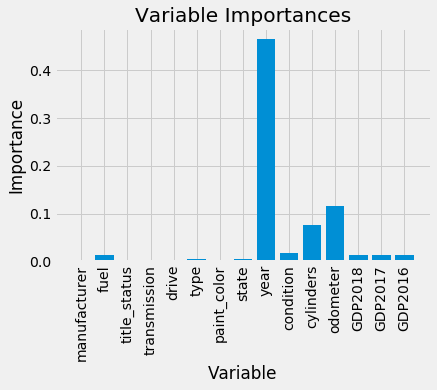

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [33]:
#import pickle
#pickle.dump(regressor, open('RandomFRegPh2.pkl','wb'))
#regressor=pickle.load(open('RandomFRegPh2.pkl', 'rb'))

### End